# House Price Prediction Data Wrangling

## By Nicholas Roller

Here we aim to wrangle and clean our data in preparation for our upcoming exploratory data analysis (EDA). We are using the House Prices - Advanced Regression Techniques dataset from Kaggle (https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data?select=data_description.txt)

In [1]:
#Import pandas, matplotlib.pyplot, and seaborn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os
from datetime import datetime, date
import numpy as np
from numpy import mean
from numpy import std
from library.sb_utils import save_file

In [2]:
#import Kaggle House Price Train Data set .csv
train_data = pd.read_csv('C:/Springboard_/CapstoneTwo/Data Files/Kaggle House Prices/train.csv')

In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Only 7 houses have pools, and 91 were adjacent to an alley. Only 54 MiscFeatures, 281 with fences., 770 fireplaces.

In [4]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Examining missing values

In [5]:
#Identifying attributes with the most missing values
missing = pd.concat([train_data.isnull().sum(), 100*train_data.isnull().mean()],axis=1)
missing.columns=['count','%']
missing.sort_values(by=['count','%']).tail(20)

,count,%
SalePrice,0,0.000000
Electrical,1,0.068493
MasVnrType,8,0.547945
MasVnrArea,8,0.547945
BsmtQual,37,2.534247
BsmtCond,37,2.534247
BsmtFinType1,37,2.534247
BsmtExposure,38,2.602740
BsmtFinType2,38,2.602740
GarageType,81,5.547945


Missing values being equal across basement and garage categories makes sense as not all houses have those ammeneties. We assume these are not missing, but rather set to NA or 0 since those particular houses do not have those features (a garage, pool, etc.) It also seems a vast majority of houses do not have pools. Luckily sale price, out dependent variable, has no missing records

In [6]:
#The only missing value that was not easily explained was in the 'ELectrical' column. 
train_data['Electrical'].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [7]:
#It should be sufficient to replace the missing value with the most common electrical type, SBrkr
train_data['Electrical'].fillna(value='SBrkr',inplace = True)

In [8]:
#Checking that the null value was replaced and nothing else.
train_data['Electrical'].value_counts()

SBrkr    1335
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

We may want to handle null values differently for numerical variables as compared to categorical ones, so we are going to seperate these value types before proceeding.

#### Now going to seperate data by dtype

In [9]:
#Subsetting our dataset for categorical and discrete variables
cat_data = train_data.select_dtypes(include='object').copy().join(train_data[['MSSubClass', 'OverallQual', 'OverallCond']])
cat_data.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,MSSubClass,OverallQual,OverallCond
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,TA,Y,NaN,NaN,NaN,WD,Normal,60,7,5
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,TA,Y,NaN,NaN,NaN,WD,Normal,20,6,8
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,TA,Y,NaN,NaN,NaN,WD,Normal,60,7,5
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,TA,Y,NaN,NaN,NaN,WD,Abnorml,70,7,5
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,TA,Y,NaN,NaN,NaN,WD,Normal,60,8,5


In [10]:
#Checking that all desired variables are present
cat_data.dtypes

MSZoning         object
Street           object
Alley            object
LotShape         object
LandContour      object
Utilities        object
LotConfig        object
LandSlope        object
Neighborhood     object
Condition1       object
Condition2       object
BldgType         object
HouseStyle       object
RoofStyle        object
RoofMatl         object
Exterior1st      object
Exterior2nd      object
MasVnrType       object
ExterQual        object
ExterCond        object
Foundation       object
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Heating          object
HeatingQC        object
CentralAir       object
Electrical       object
KitchenQual      object
Functional       object
FireplaceQu      object
GarageType       object
GarageFinish     object
GarageQual       object
GarageCond       object
PavedDrive       object
PoolQC           object
Fence            object
MiscFeature      object
SaleType        

In [11]:
cat_data.fillna(value='None', inplace=True)

In [12]:
#Confirming that all null values were given a value of NA for our categorical data
missing = pd.concat([cat_data.isna().sum(), 100*cat_data.isna().mean()],axis=1)
missing.columns=['count','%']
missing.sort_values(by=['count','%']).tail(20)

,count,%
Heating,0,0.0
HeatingQC,0,0.0
CentralAir,0,0.0
Electrical,0,0.0
KitchenQual,0,0.0
Functional,0,0.0
FireplaceQu,0,0.0
GarageType,0,0.0
GarageFinish,0,0.0
GarageQual,0,0.0


In [13]:
#Subsetting our dataset for continuous variables
num_data = train_data.select_dtypes(include=('int64','float64')).copy()
del num_data['OverallQual']
del num_data['OverallCond']
del num_data['MSSubClass']
num_data.dtypes

Id                 int64
LotFrontage      float64
LotArea            int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object

In [14]:
#Replacing missing values with 0 for attributes where it is expected (i.e. no pool for pool area)
num_data.fillna(value=0, inplace = True)

In [15]:
#Confirming that all null values were given a value of 0.
missing = pd.concat([num_data.isnull().sum(), 100*num_data.isnull().mean()],axis=1)
missing.columns=['count','%']
missing.sort_values(by=['count','%']).tail(20)

,count,%
BsmtHalfBath,0,0.0
FullBath,0,0.0
HalfBath,0,0.0
BedroomAbvGr,0,0.0
KitchenAbvGr,0,0.0
TotRmsAbvGrd,0,0.0
Fireplaces,0,0.0
GarageYrBlt,0,0.0
GarageCars,0,0.0
GarageArea,0,0.0


#### Before rejoining into one dataframe, we are going to remove outliers in numerical data that are greater than 3 standard deviations from the mean

In [16]:
mean = num_data.mean()
std= num_data.std()
cut_off = std*3

lower, upper = mean - cut_off , mean+cut_off

num_data_new = num_data[(num_data<upper)&(num_data>lower)]

In [17]:
num_data_new.shape

(1460, 35)

#### Rejoining into one DF

In [18]:
#Rejoining into a single dataframe
train_data=num_data.join(cat_data)
train_data.shape

(1460, 81)

## Converting date values to ages (elapsed time)

In [19]:
#define today's date
today = np.datetime64('today')
type(today)

numpy.datetime64

In [20]:
#There are two attributes, Month sold and year sold, these need to be combined and converted into age (days)
train_data['Age_of_sale']= (today - pd.to_datetime(dict(year=train_data.YrSold, month=train_data.MoSold, day=1))).dt.days
print(train_data['Age_of_sale'])

0       4982
1       5258
2       4769
3       5712
4       4678
        ... 
1455    5166
1456    4251
1457    4162
1458    4192
1459    4861
Name: Age_of_sale, Length: 1460, dtype: int64


In [21]:
#Converting YearBuilt to House_Age (in years) and adding as a new columns (since not provided)
train_data['House_Age']= 2021 - train_data.YearBuilt
print(train_data['House_Age'])

0        18
1        45
2        20
3       106
4        21
       ... 
1455     22
1456     43
1457     80
1458     71
1459     56
Name: House_Age, Length: 1460, dtype: int64


<AxesSubplot:xlabel='count', ylabel='YearRemodAdd'>

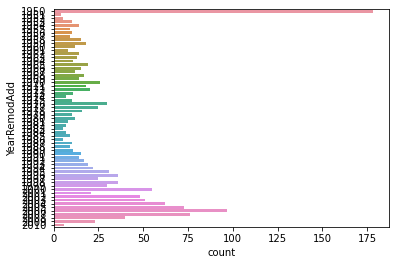

In [22]:
#Huge number of remodels occured in 1950?
sns.countplot(y='YearRemodAdd',data=train_data)

In [23]:
#For Remod_age, if the home was not remodeled, the value was then the year the house was built
#We need to remove these values so that a value fo 0 shows for Remod_Age
#train_data.loc[train_data.YearRemodAdd == train_data.YearBuilt, "YearRemodAdd"]=2021

In [24]:
#Checking that no more values of YearRemodAdd are equal to YearBuilt via the default setting
print(train_data[train_data['YearRemodAdd']==train_data['YearBuilt']]['YearRemodAdd'])

0       2003
1       1976
4       2000
7       1973
10      1965
        ... 
1449    1970
1450    1974
1452    2005
1453    2006
1459    1965
Name: YearRemodAdd, Length: 764, dtype: int64


In [25]:
#Converting YearRemodAdd to Remod_Age (in years) and adding as a new columns (since not provided)
train_data['Remod_Age']= 2021 - train_data.YearRemodAdd
print(train_data['Remod_Age'])

0       18
1       45
2       19
3       51
4       21
        ..
1455    21
1456    33
1457    15
1458    25
1459    56
Name: Remod_Age, Length: 1460, dtype: int64


In [26]:
#If the house does not have a garage, GarageYrBlt=0, so we must make sure values of 2021 don't falsely show Garage_Age
train_data.loc[train_data.GarageYrBlt == 0, "GarageYrBlt"]=2021

In [27]:
#Checking that no more values of 0 are present
print(train_data[train_data['GarageYrBlt']==0]['GarageYrBlt'])

Series([], Name: GarageYrBlt, dtype: float64)


In [28]:
#Converting GarageYrBlt to Garage_Age (in years) and adding as a new columns (since not provided)
train_data['Garage_Age']= 2021 - train_data.GarageYrBlt
print(train_data['Garage_Age'])

0       18.0
1       45.0
2       20.0
3       23.0
4       21.0
        ... 
1455    22.0
1456    43.0
1457    80.0
1458    71.0
1459    56.0
Name: Garage_Age, Length: 1460, dtype: float64


In [29]:
#Checking that our new column was added to our data frame.
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 85 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   LotFrontage    1460 non-null   float64
 2   LotArea        1460 non-null   int64  
 3   YearBuilt      1460 non-null   int64  
 4   YearRemodAdd   1460 non-null   int64  
 5   MasVnrArea     1460 non-null   float64
 6   BsmtFinSF1     1460 non-null   int64  
 7   BsmtFinSF2     1460 non-null   int64  
 8   BsmtUnfSF      1460 non-null   int64  
 9   TotalBsmtSF    1460 non-null   int64  
 10  1stFlrSF       1460 non-null   int64  
 11  2ndFlrSF       1460 non-null   int64  
 12  LowQualFinSF   1460 non-null   int64  
 13  GrLivArea      1460 non-null   int64  
 14  BsmtFullBath   1460 non-null   int64  
 15  BsmtHalfBath   1460 non-null   int64  
 16  FullBath       1460 non-null   int64  
 17  HalfBath       1460 non-null   int64  
 18  BedroomA

In [30]:
#Now removing columns that won't be used in our analysis (ID, MoSold, YrSold, YearBuilt, YearRemodAdd, GarageYrBlt)
del train_data['Id']
del train_data['MoSold']
del train_data['YrSold']
del train_data['YearBuilt']
del train_data['YearRemodAdd']
del train_data['GarageYrBlt']
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotFrontage    1460 non-null   float64
 1   LotArea        1460 non-null   int64  
 2   MasVnrArea     1460 non-null   float64
 3   BsmtFinSF1     1460 non-null   int64  
 4   BsmtFinSF2     1460 non-null   int64  
 5   BsmtUnfSF      1460 non-null   int64  
 6   TotalBsmtSF    1460 non-null   int64  
 7   1stFlrSF       1460 non-null   int64  
 8   2ndFlrSF       1460 non-null   int64  
 9   LowQualFinSF   1460 non-null   int64  
 10  GrLivArea      1460 non-null   int64  
 11  BsmtFullBath   1460 non-null   int64  
 12  BsmtHalfBath   1460 non-null   int64  
 13  FullBath       1460 non-null   int64  
 14  HalfBath       1460 non-null   int64  
 15  BedroomAbvGr   1460 non-null   int64  
 16  KitchenAbvGr   1460 non-null   int64  
 17  TotRmsAbvGrd   1460 non-null   int64  
 18  Fireplac

In [31]:
#Looking at distribution of house sales in the various neighborhoods
train_data['Neighborhood'].value_counts()

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
SWISU       25
StoneBr     25
Blmngtn     17
MeadowV     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

In [32]:
#Establish a variable storing mean home sale prices by neighborhood for future use
neighborhood_price_means = train_data.groupby('Neighborhood')[['SalePrice']].mean()
neighborhood_price_means.head()

,SalePrice
Neighborhood,
Blmngtn,194870.882353
Blueste,137500.000000
BrDale,104493.750000
BrkSide,124834.051724
ClearCr,212565.428571


In [33]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
LotFrontage,1460.0,57.623288,34.664304,0.0,42.00,63.0,79.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
MasVnrArea,1460.0,103.117123,180.731373,0.0,0.00,0.0,164.25,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0
BsmtFinSF2,1460.0,46.549315,161.319273,0.0,0.00,0.0,0.00,1474.0
BsmtUnfSF,1460.0,567.240411,441.866955,0.0,223.00,477.5,808.00,2336.0
TotalBsmtSF,1460.0,1057.429452,438.705324,0.0,795.75,991.5,1298.25,6110.0
1stFlrSF,1460.0,1162.626712,386.587738,334.0,882.00,1087.0,1391.25,4692.0
2ndFlrSF,1460.0,346.992466,436.528436,0.0,0.00,0.0,728.00,2065.0
LowQualFinSF,1460.0,5.844521,48.623081,0.0,0.00,0.0,0.00,572.0


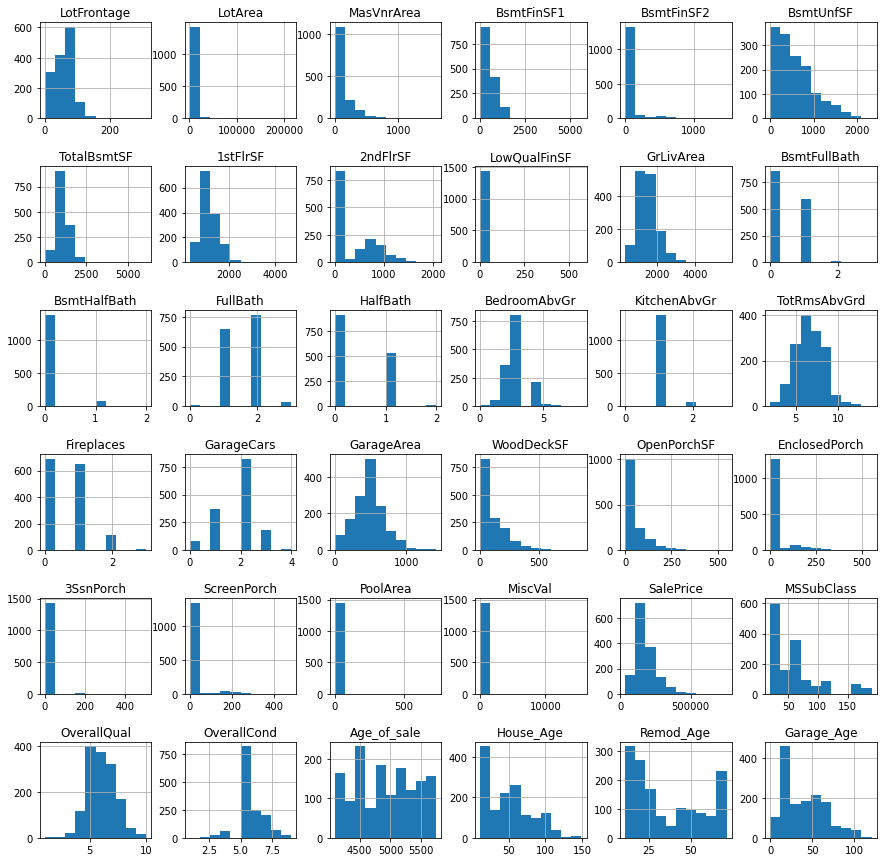

In [34]:
#Histogram plots to observe potential outliers
train_data.hist(figsize=(15,15))
plt.subplots_adjust(hspace=0.5);

In [35]:
#Possible outliers: LotArea, LowQualFinSF, EnclosedPorch, MiscVal

In [36]:
#Checking shape before removing outliers
train_data.shape

(1460, 79)

We will be removing all outliers greater than 3 standard deviations from the mean for each numerical attribute

In [37]:
mean = train_data['LotFrontage'].mean()
std= train_data['LotFrontage'].std()
cut_off = std*3

lower, upper = mean - cut_off , mean+cut_off

train_data = train_data[(train_data['LotFrontage']<upper)&(train_data['LotFrontage']>lower)]

In [38]:
mean = train_data['LotArea'].mean()
std= train_data['LotArea'].std()
cut_off = std*3

lower, upper = mean - cut_off , mean+cut_off

train_data = train_data[(train_data['LotArea']<upper)&(train_data['LotArea']>lower)]

In [39]:
mean = train_data['MasVnrArea'].mean()
std= train_data['MasVnrArea'].std()
cut_off = std*3

lower, upper = mean - cut_off , mean+cut_off

train_data = train_data[(train_data['MasVnrArea']<upper)&(train_data['MasVnrArea']>lower)]

In [40]:
mean = train_data['BsmtFinSF1'].mean()
std= train_data['BsmtFinSF1'].std()
cut_off = std*3

lower, upper = mean - cut_off , mean+cut_off

train_data = train_data[(train_data['BsmtFinSF1']<upper)&(train_data['BsmtFinSF1']>lower)]

In [41]:
mean = train_data['BsmtFinSF2'].mean()
std= train_data['BsmtFinSF2'].std()
cut_off = std*3

lower, upper = mean - cut_off , mean+cut_off

train_data = train_data[(train_data['BsmtFinSF2']<upper)&(train_data['BsmtFinSF2']>lower)]

In [42]:
mean = train_data['TotalBsmtSF'].mean()
std= train_data['TotalBsmtSF'].std()
cut_off = std*3

lower, upper = mean - cut_off , mean+cut_off

train_data = train_data[(train_data['TotalBsmtSF']<upper)&(train_data['TotalBsmtSF']>lower)]

In [43]:
mean = train_data['BsmtUnfSF'].mean()
std= train_data['BsmtUnfSF'].std()
cut_off = std*3

lower, upper = mean - cut_off , mean+cut_off

train_data = train_data[(train_data['BsmtUnfSF']<upper)&(train_data['BsmtUnfSF']>lower)]

In [44]:
mean = train_data['1stFlrSF'].mean()
std= train_data['1stFlrSF'].std()
cut_off = std*3

lower, upper = mean - cut_off , mean+cut_off

train_data = train_data[(train_data['1stFlrSF']<upper)&(train_data['1stFlrSF']>lower)]

In [45]:
mean = train_data['2ndFlrSF'].mean()
std= train_data['2ndFlrSF'].std()
cut_off = std*3

lower, upper = mean - cut_off , mean+cut_off

train_data = train_data[(train_data['2ndFlrSF']<upper)&(train_data['2ndFlrSF']>lower)]

In [46]:
mean = train_data['LowQualFinSF'].mean()
std= train_data['LowQualFinSF'].std()
cut_off = std*3

lower, upper = mean - cut_off , mean+cut_off

train_data = train_data[(train_data['LowQualFinSF']<upper)&(train_data['LowQualFinSF']>lower)]

In [47]:
mean = train_data['GrLivArea'].mean()
std= train_data['GrLivArea'].std()
cut_off = std*3

lower, upper = mean - cut_off , mean+cut_off

train_data = train_data[(train_data['GrLivArea']<upper)&(train_data['GrLivArea']>lower)]

In [48]:
mean = train_data['TotRmsAbvGrd'].mean()
std= train_data['TotRmsAbvGrd'].std()
cut_off = std*3

lower, upper = mean - cut_off , mean+cut_off

train_data = train_data[(train_data['TotRmsAbvGrd']<upper)&(train_data['TotRmsAbvGrd']>lower)]

In [49]:
mean = train_data['GarageArea'].mean()
std= train_data['GarageArea'].std()
cut_off = std*3

lower, upper = mean - cut_off , mean+cut_off

train_data = train_data[(train_data['GarageArea']<upper)&(train_data['GarageArea']>lower)]

In [50]:
mean = train_data['WoodDeckSF'].mean()
std= train_data['WoodDeckSF'].std()
cut_off = std*3

lower, upper = mean - cut_off , mean+cut_off

train_data = train_data[(train_data['WoodDeckSF']<upper)&(train_data['WoodDeckSF']>lower)]

In [51]:
mean = train_data['OpenPorchSF'].mean()
std= train_data['OpenPorchSF'].std()
cut_off = std*3

lower, upper = mean - cut_off , mean+cut_off

train_data = train_data[(train_data['OpenPorchSF']<upper)&(train_data['OpenPorchSF']>lower)]

In [52]:
mean = train_data['EnclosedPorch'].mean()
std= train_data['EnclosedPorch'].std()
cut_off = std*3

lower, upper = mean - cut_off , mean+cut_off

train_data = train_data[(train_data['EnclosedPorch']<upper)&(train_data['EnclosedPorch']>lower)]

In [53]:
mean = train_data['3SsnPorch'].mean()
std= train_data['3SsnPorch'].std()
cut_off = std*3

lower, upper = mean - cut_off , mean+cut_off

train_data = train_data[(train_data['3SsnPorch']<upper)&(train_data['3SsnPorch']>lower)]

In [54]:
mean = train_data['ScreenPorch'].mean()
std= train_data['ScreenPorch'].std()
cut_off = std*3

lower, upper = mean - cut_off , mean+cut_off

train_data = train_data[(train_data['ScreenPorch']<upper)&(train_data['ScreenPorch']>lower)]

In [55]:
mean = train_data['MiscVal'].mean()
std= train_data['MiscVal'].std()
cut_off = std*3

lower, upper = mean - cut_off , mean+cut_off

train_data = train_data[(train_data['MiscVal']<upper)&(train_data['MiscVal']>lower)]

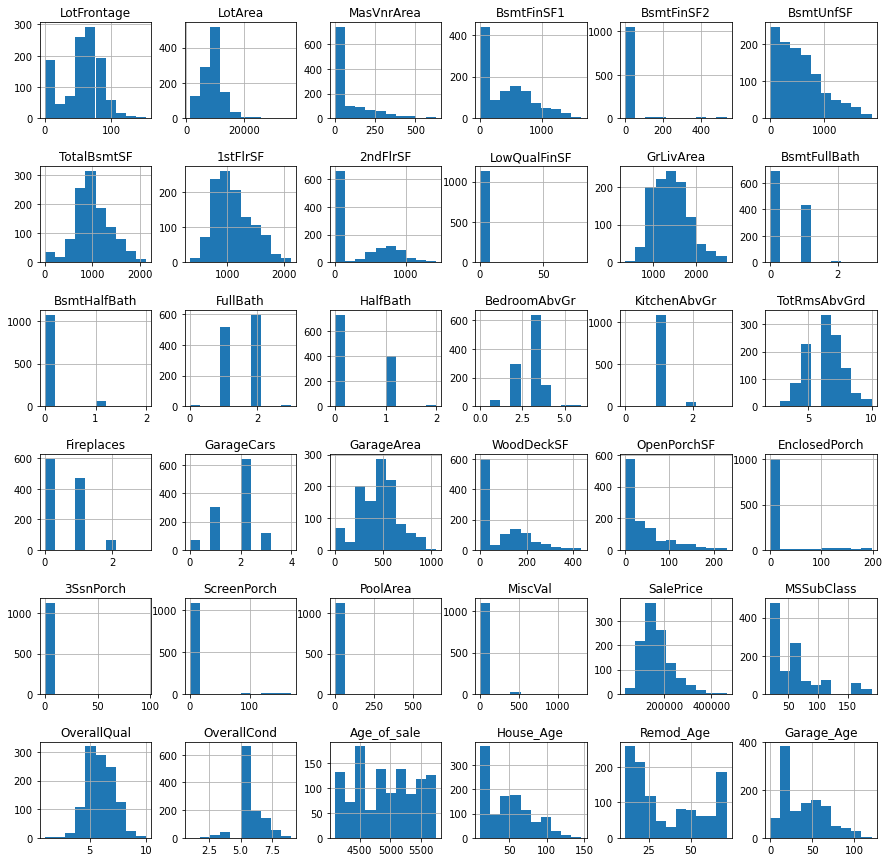

In [56]:
#Histogram plots to observe removal of outliers
train_data.hist(figsize=(15,15))
plt.subplots_adjust(hspace=0.5);

In [57]:
#Removing EnclosedPorch Outliers
train_data.shape

(1137, 79)

We expect there to be 2 less columns, down to 79 from 81, because we removed the ID column and replaced the two columns for date of sale with the one column for age of sale

In [58]:
train_data.head(10)

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,MiscFeature,SaleType,SaleCondition,MSSubClass,OverallQual,OverallCond,Age_of_sale,House_Age,Remod_Age,Garage_Age
0,65.0,8450,196.0,706,0,150,856,856,854,0,...,None,WD,Normal,60,7,5,4982,18,18,18.0
1,80.0,9600,0.0,978,0,284,1262,1262,0,0,...,None,WD,Normal,20,6,8,5258,45,45,45.0
2,68.0,11250,162.0,486,0,434,920,920,866,0,...,None,WD,Normal,60,7,5,4769,20,19,20.0
4,84.0,14260,350.0,655,0,490,1145,1145,1053,0,...,None,WD,Normal,60,8,5,4678,21,21,21.0
6,75.0,10084,186.0,1369,0,317,1686,1694,0,0,...,None,WD,Normal,20,8,5,5166,17,16,17.0
9,50.0,7420,0.0,851,0,140,991,1077,0,0,...,None,WD,Normal,190,5,6,5013,82,71,82.0
10,70.0,11200,0.0,906,0,134,1040,1040,0,0,...,None,WD,Normal,20,5,5,4982,56,56,56.0
13,91.0,10652,306.0,0,0,1494,1494,1494,0,0,...,None,New,Partial,20,7,5,5166,15,14,15.0
14,0.0,10920,212.0,733,0,520,1253,1253,0,0,...,None,WD,Normal,20,6,5,4892,61,61,61.0
15,51.0,6120,0.0,0,0,832,832,854,0,0,...,None,WD,Normal,45,7,8,5197,92,20,30.0


In [59]:
#Saving cleaned data to new csv
datapath = 'C:\Springboard_\CapstoneTwo\Data Files'
save_file(train_data,'train_data_cleaned_V2.csv', datapath)

A file already exists with this name.

Do you want to overwrite? (Y/N)Y
Writing file.  "C:\Springboard_\CapstoneTwo\Data Files\train_data_cleaned_V2.csv"
